## Handwriting Recognition

Birdn fazla makine öğrenmesi modelini bir arada kullanarak fotoğraftaki objeeri tanıyan ve anlamlandıran bir yazılım gerçekleştireceğiz.
Önce el yazısı ile yazılan rakamların fotoğraflarını sisteme yükleyip her
bir rakam için sistemimizi eğiteceğiz. Daha sonra sistemize el yazısı ile
yazılan yeni bir rakamı tanımasını isteyeceğiz.
PCA VE LOJİSTİK REGRESYON 

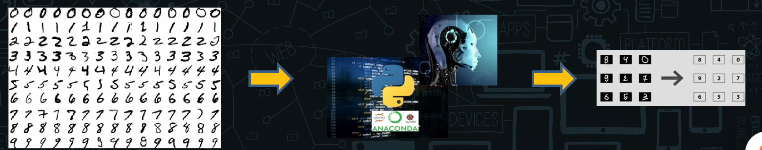

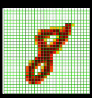    

28x28 piksel features.(60 bine yakın veri)  : 784 feature u pca kullanarak düşüreceğiz.
2.adımda da düşürülen veri setinde lojistik regresyona sokup modeli eğiticez.
ve test veri setinde testleri yapacağız.

Projedeki veri seti MNIST elyazsısı rakamları veritabanında(sklerarn içinde gelmektedir.)784 feturesütunu mevcut(784 dimensions) ve training seti olarak 60 bin örnek veri seti ve 10 bin test veri seti bulunmaktadır.


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml  # mnist veri seti için.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784')

In [6]:
mnist.data.shape

(70000, 784)

## Mnist veri seti içindeki rakam fotoğraflarını görmek için bir fonksiyon tanımlayın.

In [7]:
#parametre olarak dataframe ve ilgili veri fotoğrafının index numarasını alsın.
def showimage(dframe,index):
    some_digit = dframe.to_numpy()[index]   # göreseli digite çeviriyorz.
    some_digit_image = some_digit.reshape(28,28)
    
    plt.imshow(some_digit_image,cmap='binary')
    plt.axis('off')
    plt.show()

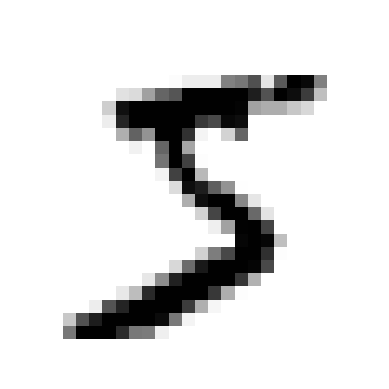

In [9]:
#örnek kullanım : 
showimage(mnist.data,0)

#### Her bir image dosyası için 784 boyut (feture) mevcut.

In [10]:
# test ve train oranı : 1/7 ve 6/7
train_img,test_img,train_lbl,test_lbl = train_test_split(mnist.data,mnist.target,test_size=1/7.0,random_state=0)

In [11]:
type(train_img)

pandas.core.frame.DataFrame

In [12]:
# rakam ve tahminlerimizi check etmek için train_img fa ini kopyalıyoruz,çünkü az sonra değişecek.
# en sonda doğru tahmin edip edmediğimizi kontrol edicez. bu yüzden kopyalıyoruz.
test_img_copy = test_img.copy()

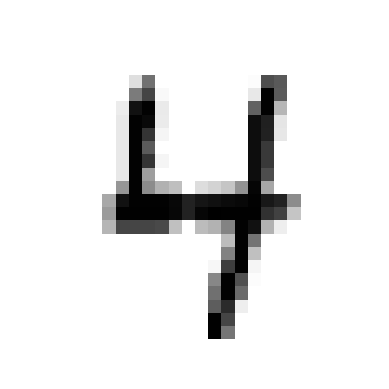

In [14]:
showimage(test_img_copy,1)

### verileri scale etmemmiz gerekiyor.  
Çünkü PCA scale edilmemiş verilerde hatalı sonuçlar verebiliyor bu nedenle mutlaka scaling işleminden geçiriyoruz.Bu amaçla da StandardScaler kullanıyoruz.

In [16]:
scaler = StandardScaler()

# scaler ı sadece training set üzerine fit yapmanız yeterli.
scaler.fit(train_img)

# ama transform işlemini hem train hem de test setine yapmak gerekiyor.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

## PCA işlemini uygulayalım...  
varyansın %95 oranında korunmasını istediğimizi belirtiyoruz...

In [23]:
pca = PCA(.95)

In [24]:
# PCA ı sadece train sete yapmamız yeterli. 
pca.fit(train_img)

PCA(n_components=0.95)

In [25]:
# bakalım 84b boyutu kaç boyuta düşürebilmişiz.
#  (95 varyansı koruyarak tabiki)784 dü.

print(pca.n_components_)

237


In [26]:
# transform işlemiyle hem train hem test seti boyutlarını 784 den 327 ye düşürelim.
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

### 2.AŞAMA :   
Makine öğrenmesi modeli olan lojistik regresyon modelimizi PCA işleminden geçirilmiş veri setimiz üzerinde uygulayacağız.

In [27]:
# default solver çok yavaş çalıştığı için daha hızlı olan 'lbfgs' solverı 
  # seçerek logisticregression nesnemizi oluşturuyoruz.
logisticRegr = LogisticRegression(solver='lbfgs',max_iter = 10000)
# veri seti ve features sayıları daha fazlaysa maxiter daha da arttırılabilir.

In [29]:
# eğitim 
logisticRegr.fit(train_img,train_lbl) # resim ve labelını vererek eğitiyoruz.

LogisticRegression(max_iter=10000)

In [31]:
#tanıma işlemi 
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

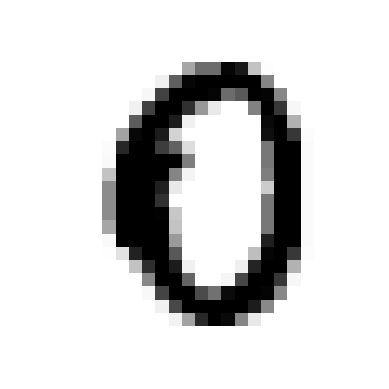

In [32]:
showimage(test_img_copy,0)

In [33]:
logisticRegr.predict(test_img[2].reshape(1,-1))

array(['1'], dtype=object)

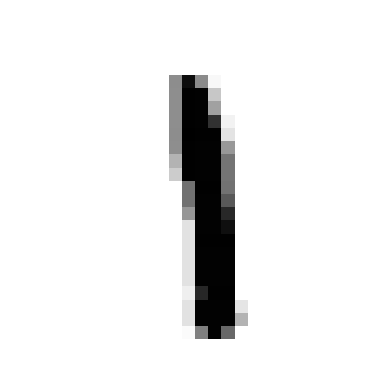

In [34]:
showimage(test_img_copy,2)

## Kodumuzun model (accuracy) doğruluk ölçmek

In [37]:
# modelimizin doğruluk oranı (accuracy) ölçmek için score metodunu kullanacağız.
logisticRegr.score(test_img,test_lbl)

0.9198

### Sonuç ve Değerlendirme 

Bu projode PCA kullanarak logistic regression tarafından yapay zckanın eğitilme sürcsini öncmli ölçüde kısalttık. Ben %95 variance korumayı hedeficdim. Siz
% 96 variance'ı daha düşük seviyelere çekerek sürenin ne ölçüde kısaltıdığınıı kendiniz deneyerek bulabilirsiniz. 10 tane digit için yapay zekanırı eğitimn süresini
çok büyük ölçüde kısaltan PCA algoritması yüizlerce hatta binlerce değişik nesne tipi için yapay zekanın eğitim süresini saatler mertebesinde kısaltacak ve bu
da sizin programlannızın çok daha hızlı çalışmasını sağlayacaktır.

Bu proje lle birbirinden tamamen farklı 2 makine öğrenme modellni bir araya getirip gürlük hayatta karşımıza çıkabilecek bir işi bligisayarımıza yapay zeka
programi yazarak gerçekleştirdik !

Gerçekten düşününce süper bir teknoloji, el yazısıyla yazılmış rakamları otomatik olarak tanıyıp bunu bilgisayanın anlayablleceği djital bir sayı karakterine
dönüştüretillyoruz! Bira Uzerinde düşünürseniz böyle bir teknolojlyl kullanarak çok çeşiti icatlar ve ürünler ortaya çıkarabllirsinlz. Mesela ... bu projeyi biraz
daha geliştirip (alfabedeki harfleri de ckleyip) otomatik olarak el yazısı ile yazılmış dilekçeleri okuyan ve djital Microsoft Word dosyasına veya PDF dosyasına
dönüştüren bir software oluşturabilirsiniz. İnsanlar fotoğrafını çekerek oluşlurduğu bir dilekçeyi ctomatik olarak sisteminize yükleyebiir ve siz de veritabanırıa
metin olarak kaydedebilirsiniz. Aradaki bir çok manuel adımı yapay zeka sayesinde atlamış olursunuz!